In [1]:
import time
from pymongo import MongoClient

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
mongoDBClient = MongoClient()
analytics_DB = mongoDBClient.analytics
ua_col = analytics_DB.live_user_activity

In [4]:
brh_loc = [["bengaluru", (12.9716, 77.5946), 0.02], ["delhi", (28.7041, 77.1025),0.02]] 

In [5]:
def get_live_users_data_within_radius(latitude, longitude, range):
    result = ua_col.find({"location": {"$geoWithin": { "$centerSphere": [ [ longitude, latitude ], 0.02 ]}}})
    return result

In [6]:
def get_above_thrershold_urls(data, medium):
    url_hit = {}
    above_threshold_urls = []
    for row in data:
        url = row["url"]
        if not medium == row["medium"]:
            continue
        if not url in url_hit:
            url_hit[url] = 0
        url_hit[url] = url_hit[url] + 1

    return url_hit

In [7]:
from IPython.display import clear_output

<BarContainer object of 0 artists>

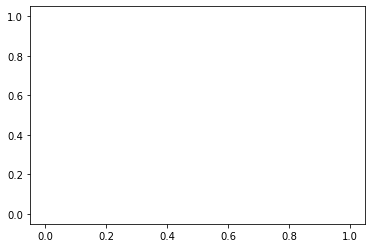

In [8]:
live_users_data = get_live_users_data_within_radius(brh_loc[0][1][0], brh_loc[0][1][1], 200)
broadcast_contents  = get_above_thrershold_urls(live_users_data, "broadcast")
plt.bar(broadcast_contents.keys(), broadcast_contents.values())

In [9]:
live_users_data = get_live_users_data_within_radius(brh_loc[0][1][0], brh_loc[0][1][1], 200)
broadband_contents  = get_above_thrershold_urls(live_users_data, "broadband")

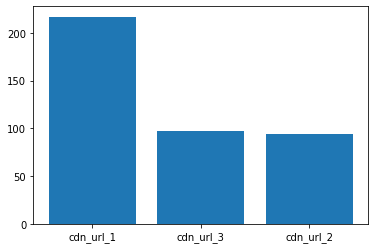

In [ ]:

from IPython import display

while True:
    plt.gca().cla() 
    live_users_data = get_live_users_data_within_radius(brh_loc[0][1][0], brh_loc[0][1][1], 200)
    broadband_contents  = get_above_thrershold_urls(live_users_data, "broadband")
    plt.bar(broadband_contents.keys(), broadband_contents.values())
    display.clear_output(wait=True)
    display.display(plt.gcf()) 
    time.sleep(2) 